In [21]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [22]:
#loading the dataset
df=pd.read_csv('../input/earthquake-database/database.csv')
#showing the dataset
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

# Preprocessing

In [24]:
#checking for missing value
df.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [25]:
#checking for mean of the column
df.isna().mean()

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.809457
Depth Seismic Stations        0.696865
Magnitude                     0.000000
Magnitude Type                0.000128
Magnitude Error               0.986033
Magnitude Seismic Stations    0.890484
Azimuthal Gap                 0.688237
Horizontal Distance           0.931488
Horizontal Error              0.950624
Root Mean Square              0.258842
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
dtype: float64

In [26]:
df.shape[0]

23412

In [27]:
#checking for columns with more than 66 percent missing value
null_columns=df.loc[:,df.isna().sum()>0.66*df.shape[0]].columns

In [28]:
null_columns

Index(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
       'Horizontal Error'],
      dtype='object')

In [29]:
#dropping the column with more than 66 percent missing value
df=df.drop(null_columns,axis=1)

In [30]:
#now getting information about the dataset
df.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
ID                     0
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [33]:
df['Root Mean Square']=df['Root Mean Square'].fillna(df['Root Mean Square'].mean())

In [34]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [35]:
#dropping the rows with missing values
df=df.dropna(axis=0).reset_index(drop=True)

In [36]:
#now thecking missingvalues 
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [37]:
df.isna().sum().sum()

0

In [38]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed


In [39]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed


In [42]:
df['Month']=df['Date'].apply(lambda x:x[0:2])

df['Day']=df['Date'].apply(lambda x:x[3:5])
df['Year']=df['Date'].apply(lambda x:x[-4:])


In [49]:
invalid_year_indices=df[df['Year'].str.contains('Z')].index

In [50]:
invalid_year_indices

Int64Index([3378, 7510, 20647], dtype='int64')

In [53]:
#droping the
df=df.drop(invalid_year_indices,axis=0).reset_index(drop=True)

In [43]:
df['Day']

0        02
1        04
2        05
3        08
4        09
         ..
23404    28
23405    28
23406    28
23407    29
23408    30
Name: Day, Length: 23409, dtype: object

In [45]:
#droping the original date column
df=df.drop('Date',axis=1)

In [47]:
df['Year'].isna().sum()

0

In [54]:
df['Year']=df['Year'].astype(np.int)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [56]:
df['Hour']=df['Time'].apply(lambda x:np.int(x[0:2]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [57]:
df['Hour']

0        13
1        11
2        18
3        18
4        13
         ..
23401     8
23402     9
23403    12
23404    22
23405    20
Name: Hour, Length: 23406, dtype: int64

In [59]:
#dropping the original time column
df=df.drop('Time',axis=1)

# Visualize

In [67]:
numeric_columns=[column for column in df.columns if df.dtypes[column]!='object']

In [68]:
numeric_columns

['Latitude',
 'Longitude',
 'Depth',
 'Magnitude',
 'Root Mean Square',
 'Status',
 'Year',
 'Hour']

In [69]:
#creatng the correlation matrix
corr=df[numeric_columns].corr()

<AxesSubplot:>

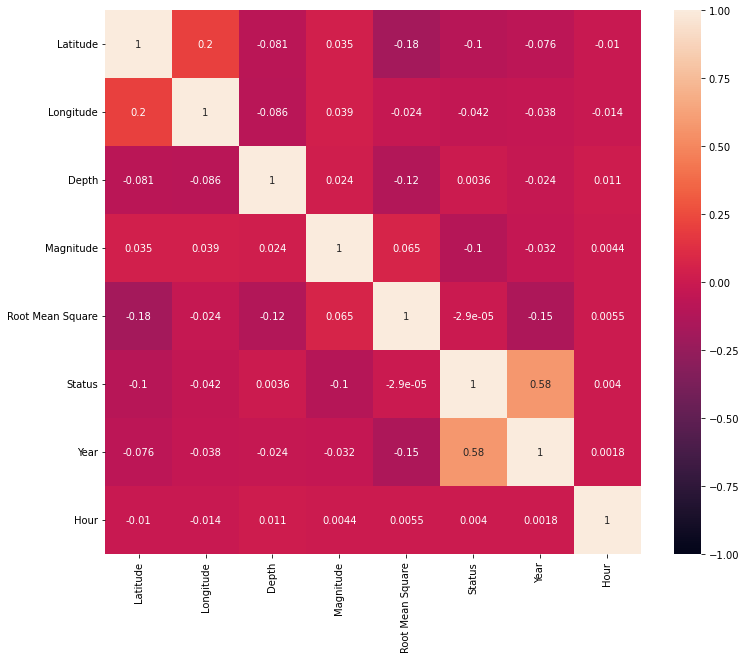

In [70]:
#plotting the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=-1.0,vmax=1.0)

In [71]:
df['Status'].unique()

array([0, 1])

In [65]:
df['Status']=df['Status'].apply(lambda x:1 if x=='Reviewed' else 0)

In [66]:
df['Status']

0        0
1        0
2        0
3        0
4        0
        ..
23401    1
23402    1
23403    1
23404    1
23405    1
Name: Status, Length: 23406, dtype: int64

In [72]:
numeric_columns.remove('Status')

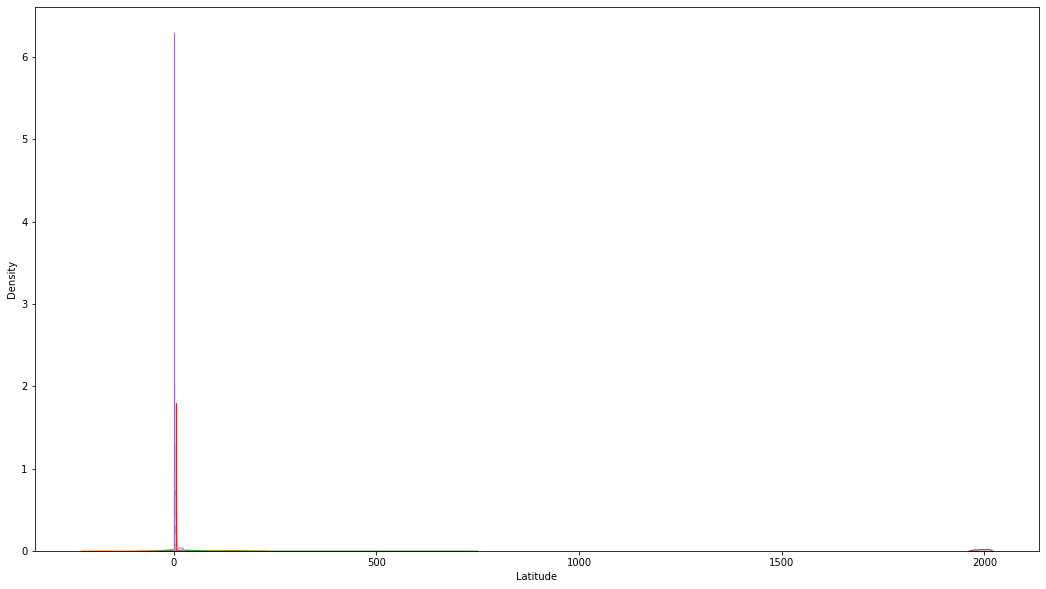

In [74]:
plt.figure(figsize=(18,10))
for column in numeric_columns:
    sns.kdeplot(df[column],shade=True)
plt.show()

In [75]:
scaler=StandardScaler()
standardized_df=scaler.fit_transform(df[numeric_columns]).copy()

In [76]:
standardized_df

array([[ 5.83557180e-01,  8.44244865e-01,  4.96241414e-01, ...,
         8.27584655e-05, -1.91551569e+00,  2.25118842e-01],
       [ 6.27490336e-03,  6.98723034e-01,  7.53915938e-02, ...,
         8.27584655e-05, -1.91551569e+00, -6.51114867e-02],
       [-7.39014682e-01, -1.70213221e+00, -4.13968662e-01, ...,
         8.27584655e-05, -1.91551569e+00,  9.50694665e-01],
       ...,
       [ 1.17043371e+00,  8.02894164e-01, -4.95528705e-01, ...,
         3.06316015e+00,  1.61969877e+00,  8.00036778e-02],
       [-3.55420688e-01,  6.29498975e-01,  6.72355895e-02, ...,
         2.50871910e+00,  1.61969877e+00,  1.53115532e+00],
       [ 1.18635438e+00,  8.10735165e-01, -4.79706056e-01, ...,
        -6.94718060e-01,  1.61969877e+00,  1.24092499e+00]])

In [81]:
standardized_df=pd.DataFrame(standardized_df,columns=numeric_columns)

In [82]:
standardized_df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Year,Hour
0,0.583557,0.844245,0.496241,0.277523,0.000083,-1.915516,0.225119
1,0.006275,0.698723,0.075392,-0.195182,0.000083,-1.915516,-0.065111
2,-0.739015,-1.702132,-0.413969,0.750228,0.000083,-1.915516,0.950695
3,-2.017484,-0.503673,-0.454749,-0.195182,0.000083,-1.915516,0.950695
4,0.340862,0.691353,-0.454749,-0.195182,0.000083,-1.915516,0.225119
...,...,...,...,...,...,...,...
23401,1.219378,-1.263289,-0.476770,-0.667888,-5.131479,1.619699,-0.500457
23402,1.218913,-1.263302,-0.505316,-0.904240,-4.953441,1.619699,-0.355342
23403,1.170434,0.802894,-0.495529,0.041170,3.063160,1.619699,0.080004
23404,-0.355421,0.629499,0.067236,0.986581,2.508719,1.619699,1.531155


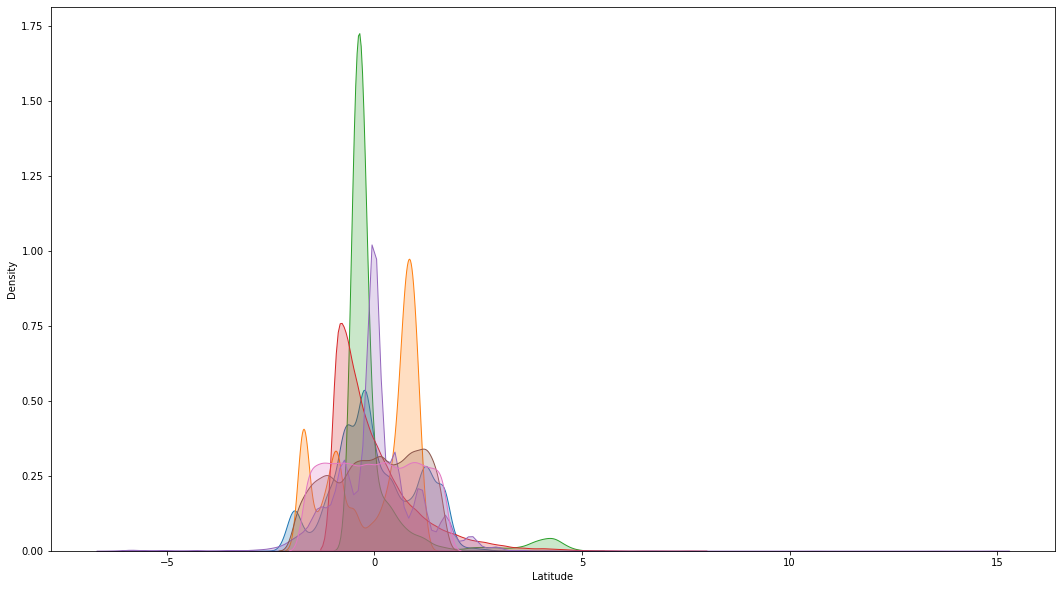

In [83]:
plt.figure(figsize=(18,10))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column],shade=True)
plt.show()

In [84]:
#Encoding

In [85]:
df['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [86]:
pd.get_dummies(df['Type'])

,Earthquake,Explosion,Nuclear Explosion,Rock Burst
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
23401,1,0,0,0
23402,1,0,0,0
23403,1,0,0,0
23404,1,0,0,0


In [95]:
def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [90]:
df['Location Source']!=df['Magnitude Source']

0        False
1        False
2        False
3        False
4        False
         ...  
23401    False
23402    False
23403    False
23404    False
23405    False
Length: 23406, dtype: bool

In [91]:
#dropping id column
df=df.drop("ID",axis=1)

In [96]:
df=onehot_encode(
    df, ['Type','Magnitude Type','Source','Location Source','Magnitude Source'],
    ['t','mt','s','ls','ms'])

In [97]:
df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Day,Year,Hour,...,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,01,02,1965,13,...,0,0,0,0,0,0,0,0,0,0
1,1.8630,127.3520,80.00,5.8,1.022784,0,01,04,1965,11,...,0,0,0,0,0,0,0,0,0,0
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,01,05,1965,18,...,0,0,0,0,0,0,0,0,0,0
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,01,08,1965,18,...,0,0,0,0,0,0,0,0,0,0
4,11.9380,126.4270,15.00,5.8,1.022784,0,01,09,1965,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,12.30,5.6,0.189800,1,12,28,2016,8,...,1,0,0,0,0,0,0,0,0,0
23402,38.3777,-118.8957,8.80,5.5,0.218700,1,12,28,2016,9,...,1,0,0,0,0,0,0,0,0,0
23403,36.9179,140.4262,10.00,5.9,1.520000,1,12,28,2016,12,...,0,0,0,0,0,0,1,0,0,0
23404,-9.0283,118.6639,79.00,6.3,1.430000,1,12,29,2016,22,...,0,0,0,0,0,0,1,0,0,0


# Splitting and Scaling

In [98]:
y=df.loc[:,'Status']
x=df.drop('Status',axis=1)

In [99]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=56)

# Modeling and Training

In [101]:
x.shape

(23406, 105)

In [102]:
y.mean()

0.88737930445185

In [108]:
inputs=tf.keras.Input(shape=(105,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs,outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)
batch_size=32
epochs=30
history=model.fit(
    x_train,
    y_train,
    validation_split=0.2, batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

In [109]:
model.evaluate(x_test,y_test)

220/220 [==============================] - 0s 2ms/step - loss: 5.7345e-06 - auc: 1.0000


[5.734485512220999e-06, 1.0]